In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/raid-dataset/extra.csv
/kaggle/input/raid-dataset/train.csv
/kaggle/input/raid-dataset/test.csv


In [2]:
import pandas as pd

# 1. Load the CSV
df = pd.read_csv('/kaggle/input/raid-dataset/train.csv')

# 2. Filter for human and GPT-4 rows
#    (replace 'model' with whatever your column is called)
df_human = df[df['model'] == 'human']
df_gpt4  = df[df['model'] == 'gpt4']

# 3. Sample 5000 from each (if you only need up to 5000, use min count)
n = 5000
df_human_samp = df_human.sample(n=min(n, len(df_human)), random_state=42)
df_gpt4_samp  = df_gpt4.sample(n=min(n, len(df_gpt4)),   random_state=42)

# 4. Combine and shuffle
df_sample = pd.concat([df_human_samp, df_gpt4_samp]).sample(frac=1, random_state=42).reset_index(drop=True)

print(df_sample.shape)   # should be (10000, …)
print(df_sample['model'].value_counts())


(10000, 11)
model
gpt4     5000
human    5000
Name: count, dtype: int64


In [3]:
# 2. Filter for human and GPT-4 rows
#    (replace 'model' with whatever your column is called)
df_human = df[df['model'] == 'human']
df_gpt4  = df[df['model'] == 'gpt4']
df_chatgpt=df[df['model'] == 'chatgpt']

# 3. Sample 5000 from each (if you only need up to 5000, use min count)

df_human_samp = df_human.sample(n=min(20000, len(df_human)), random_state=42)
df_gpt4_samp  = df_gpt4.sample(n=min(20000, len(df_gpt4)),   random_state=42)
df_chatgpt_samp  = df_chatgpt.sample(n=min(20000, len(df_chatgpt)),   random_state=42)

# 4. Combine and shuffle
df_sample = pd.concat([df_human_samp, df_gpt4_samp,df_chatgpt_samp]).sample(frac=1, random_state=42).reset_index(drop=True)

print(df_sample.shape)   # should be (10000, …)
print(df_sample['model'].value_counts())

(60000, 11)
model
human      20000
gpt4       20000
chatgpt    20000
Name: count, dtype: int64


In [4]:
# 1) Save the sampled DataFrame to CSV
df_sample.to_csv('sampled_train.csv', index=False)


## Preprocessing

In [5]:
df=pd.read_csv("/kaggle/working/sampled_train.csv")

In [6]:
df.head()


,id,adv_source_id,source_id,model,decoding,repetition_penalty,attack,domain,title,prompt,generation
0,56a0eb85-8d33-4b7c-96b1-edde193e3536,9351499c-21fd-4d94-906f-28cc40a6fbab,9351499c-21fd-4d94-906f-28cc40a6fbab,human,NaN,NaN,number,reddit,My mom is shaming me for wanting to get off of...,NaN,I have been medicated for ADHD and anxiety for...
1,375ccfff-b83a-47a4-af50-d0c28e044f50,dbc75b18-0a96-47f5-b9d4-5e885f94dacb,ab5d1a0b-22a0-4933-9cb9-65026cd569b4,gpt4,greedy,no,insert_paragraphs,reddit,DAE feel like their dreams make up memories? A...,"Write just the body of a Reddit post titled ""D...",I've been experiencing this strange phenomenon...
2,90dce70c-1212-4e49-bd4b-9eee832048c0,d18cad56-11bf-4996-a22b-2b886c4bbef3,a48234f2-e5fb-471a-be2c-06500667b4e2,gpt4,sampling,no,article_deletion,news,FBI agent colludes with analyst,"Write the body of a BBC news article titled ""F...",An FBI agent stands accused of colluding with ...
3,9e767500-0b0e-4e5b-9842-da4bf6812f75,757dc95e-18ef-4128-bcef-16028efe4202,757dc95e-18ef-4128-bcef-16028efe4202,human,NaN,NaN,insert_paragraphs,abstracts,Towards the effectiveness of Deep Convolutiona...,NaN,Deep Learning is considered to be a quite youn...
4,570ddd69-e566-44f3-a314-96475fe55eaa,5bfe05cb-02aa-44d5-8b31-f827a1e6ef04,5bfe05cb-02aa-44d5-8b31-f827a1e6ef04,human,NaN,NaN,number,books,Helen,NaN,"Helen tells the story of a young orphan, Hele..."


In [7]:
df_main=df[["model","title","generation"]]

In [9]:
df_main["text"]=df['title']+df['generation']

/tmp/ipykernel_35/3475066341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main["text"]=df['title']+df['generation']


In [10]:
df_main.head()

,model,title,generation,text
0,human,My mom is shaming me for wanting to get off of...,I have been medicated for ADHD and anxiety for...,My mom is shaming me for wanting to get off of...
1,gpt4,DAE feel like their dreams make up memories? A...,I've been experiencing this strange phenomenon...,DAE feel like their dreams make up memories? A...
2,gpt4,FBI agent colludes with analyst,An FBI agent stands accused of colluding with ...,FBI agent colludes with analystAn FBI agent st...
3,human,Towards the effectiveness of Deep Convolutiona...,Deep Learning is considered to be a quite youn...,Towards the effectiveness of Deep Convolutiona...
4,human,Helen,"Helen tells the story of a young orphan, Hele...","Helen Helen tells the story of a young orphan,..."


In [11]:
label_map={
    'human':0,
    'gpt4':1,
    'chatgpt':1
}

In [13]:
df_main['model']=df_main['model'].map(label_map);

/tmp/ipykernel_35/946050259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['model']=df_main['model'].map(label_map);


In [17]:
df=df_main[["model","text"]]

## stage 1

In [18]:
import re
import string
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

# If you haven’t already:
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer    = PorterStemmer()


In [19]:
def preprocess_text(text):
    # 1. Replace URLs, hashtags, mentions, numbers, currency
    text = re.sub(r'http\S+|www\.\S+', 'HTTPADDR', text)
    text = re.sub(r'#\w+', 'HSTIDS', text)
    text = re.sub(r'@\w+', 'USERID', text)
    text = re.sub(r'\d+', 'NUMIDS', text)
    text = re.sub(r'[€£\$]', 'CURRIDS', text)
    # 2. Drop non-ASCII (emojis, non-alphabetic punctuation)
    text = text.encode('ascii', errors='ignore').decode()
    # 3. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # 4. Tokenize & lowercase
    tokens = word_tokenize(text.lower())
    # 5. Remove stop-words & stem
    tokens = [stemmer.stem(tok) for tok in tokens if tok not in stop_words]
    return tokens


In [20]:
# Assume df is already loaded, with columns 'text' and 'model'
df['tokens'] = df['text'].map(preprocess_text)
# Quick sanity-check
print(df[['text','tokens']].head(3))


                                                text  \
0  My mom is shaming me for wanting to get off of...   
1  DAE feel like their dreams make up memories? A...   
2  FBI agent colludes with analystAn FBI agent st...   

                                              tokens  
0  [mom, shame, want, get, medic, instead, go, wa...  
1  [dae, feel, like, dream, make, memori, cant, t...  
2  [fbi, agent, collud, analystan, fbi, agent, st...  


/tmp/ipykernel_35/2073079088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['text'].map(preprocess_text)


In [21]:
from collections import Counter

# Flatten all token lists into one big list
all_tokens = [tok for tokens in df['tokens'] for tok in tokens]
freq_map   = Counter(all_tokens)

# Inspect the 10 most common & 10 rarest words
print("Most common:", freq_map.most_common(10))
rare = [w for w, c in freq_map.items() if c == 1]
print("A few words with freq=1:", rare[:10])


Most common: [('numid', 206108), ('th', 91620), ('n', 54717), ('nd', 53078), ('f', 45438), ('numidsnumid', 45328), ('also', 30650), ('cup', 30536), ('one', 29143), ('time', 26349)]
A few words with freq=1: ['mmnttng', 'furycaptain', 'heartgrip', 'duallevel', 'zkr', 'sglk', 'rhthmst', 'ndss', 'flatsnumid', 'setswhil']


In [22]:
RARE_THRESHOLD = 10
def replace_rare(tokens):
    return [tok if freq_map[tok] >= RARE_THRESHOLD else 'rareWord'
            for tok in tokens]

df['tokens'] = df['tokens'].map(replace_rare)
# Check again
print(df[['tokens']].head(3))


                                              tokens
0  [mom, shame, want, get, medic, instead, go, wa...
1  [dae, feel, like, dream, make, memori, cant, t...
2  [fbi, agent, collud, rareWord, fbi, agent, sta...


/tmp/ipykernel_35/2439514293.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['tokens'].map(replace_rare)


In [27]:
df.to_csv("stage1.csv")

## stage 2


In [28]:
import pandas as pd

# Assuming df has columns 'tokens' and 'model' (0=human, 1=AI)
n = 5000

# 1. Sample 5 000 from each class
df0 = df[df['model'] == 0].sample(n=min(n, len(df[df['model']==0])), random_state=42)
df1 = df[df['model'] == 1].sample(n=min(n, len(df[df['model']==1])), random_state=42)

# 2. Combine & shuffle
df_sub = pd.concat([df0, df1]).sample(frac=1, random_state=42).reset_index(drop=True)

print("Subset shape:", df_sub.shape)
print(df_sub['model'].value_counts())


Subset shape: (10000, 3)
model
1    5000
0    5000
Name: count, dtype: int64


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# We need a string corpus—join each token list into space-separated text
corpus = [" ".join(tokens) for tokens in df_sub['tokens']]

# Fit TF–IDF on the full corpus (IDF only)
# 4. Fit a new TF–IDF on just the subset
tfidf_vec_sub = TfidfVectorizer(max_features=50000)
tfidf_vec_sub.fit(corpus)


TfidfVectorizer(max_features=50000)

In [46]:
import numpy as np

# Parameters
MAX_VOCAB_SIZE = 48   # number of tokens per tweet to keep
EPS = 1e-8            # small constant for division

def build_cooccurrence_matrix(tokens, tfidf_vec):
    """
    tokens: list of preprocessed tokens for one tweet
    tfidf_vec: fitted TfidfVectorizer
    Returns: M×M numpy array, where M = MAX_VOCAB_SIZE
    """
    # 1. Select up to M unique tokens, preserving order
    uniq = []
    for t in tokens:
        if t not in uniq:
            uniq.append(t)
        if len(uniq) >= MAX_VOCAB_SIZE:
            break
    # Pad with a special token if needed
    while len(uniq) < MAX_VOCAB_SIZE:
        uniq.append('<PAD>')

    # 2. Compute TF–IDF vector for this tweet over our vocab
    text = " ".join(tokens)
    tfidf_row = tfidf_vec.transform([text]).toarray()[0]  # shape (V_full,)
    # Extract the TF–IDF values for our uniq tokens
    idf_vals = np.array([ tfidf_row[ tfidf_vec.vocabulary_.get(w, -1) ] 
                          if w in tfidf_vec.vocabulary_ else 0.0
                          for w in uniq ])

    # 3. Count frequencies in the tweet
    freq = {w: tokens.count(w) for w in uniq}

    # 4. Build M×M matrix
    M = MAX_VOCAB_SIZE
    mat = np.zeros((M, M), dtype=float)
    # Diagonal ← TF–IDF
    for i in range(M):
        mat[i, i] = idf_vals[i]

    # Off-diagonals
    for i in range(M):
        for j in range(M):
            if i == j:
                continue
            # co-occurrence count
            cooc = 1 if (freq.get(uniq[i], 0) > 0 and freq.get(uniq[j],0) > 0) else 0
            if i > j:
                mat[i, j] = cooc
            else:  # i < j, normalized “correlation”
                denom = freq.get(uniq[i],0) * freq.get(uniq[j],0) + EPS
                mat[i, j] = cooc / denom

    return mat


In [47]:
# Example: build and store the matrix for the first tweet
example_mat = build_cooccurrence_matrix(df.loc[0, 'tokens'], tfidf_vec)
print("Shape:", example_mat.shape)
print(example_mat)


Shape: (48, 48)
[[0.27441466 0.33333333 0.16666667 ... 0.16666667 0.33333333 0.33333333]
 [1.         0.0923223  0.5        ... 0.5        0.99999999 0.99999999]
 [1.         1.         0.09663782 ... 0.25       0.5        0.5       ]
 ...
 [1.         1.         1.         ... 0.10805361 0.5        0.5       ]
 [1.         1.         1.         ... 1.         0.05201217 0.99999999]
 [1.         1.         1.         ... 1.         1.         0.07235461]]


In [48]:
# Pre-allocate and build
N_sub = len(df_sub)
M = MAX_VOCAB_SIZE
matrices_sub = np.zeros((N_sub, M, M), dtype=float)

for idx, tokens in enumerate(df_sub['tokens']):
    matrices_sub[idx] = build_cooccurrence_matrix(tokens, tfidf_vec_sub)
    if idx % 1000 == 0:
        print(f"[{idx}/{N_sub}] matrices built")

[0/10000] matrices built
[1000/10000] matrices built
[2000/10000] matrices built
[3000/10000] matrices built
[4000/10000] matrices built
[5000/10000] matrices built
[6000/10000] matrices built
[7000/10000] matrices built
[8000/10000] matrices built
[9000/10000] matrices built


## Stage 3

In [49]:
import torch
from torch.utils.data import Dataset, DataLoader

class MatrixDataset(Dataset):
    def __init__(self, matrices):
        # matrices: np.array of shape (N, M, M)
        self.mats = torch.from_numpy(matrices).float().unsqueeze(1)  # → (N,1,M,M)

    def __len__(self):
        return self.mats.size(0)

    def __getitem__(self, idx):
        return self.mats[idx]

# Replace `matrices_sub` with your array; choose batch_size=4 as in paper
dataset = MatrixDataset(matrices_sub)
loader  = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=2, drop_last=True)


In [50]:
import torch.nn as nn

class UNetGenerator(nn.Module):
    def __init__(self, in_ch=1, ngf=64):
        super().__init__()
        # Encoder (downsamples by 2 each layer)
        self.enc1 = nn.Sequential(nn.Conv2d(in_ch,    ngf, 4, 2, 1),
                                   nn.BatchNorm2d(ngf), nn.LeakyReLU(0.2))
        self.enc2 = nn.Sequential(nn.Conv2d(ngf,  ngf*2, 4, 2, 1),
                                   nn.BatchNorm2d(ngf*2), nn.LeakyReLU(0.2))
        self.enc3 = nn.Sequential(nn.Conv2d(ngf*2,ngf*4, 4, 2, 1),
                                   nn.BatchNorm2d(ngf*4), nn.LeakyReLU(0.2))
        self.enc4 = nn.Sequential(nn.Conv2d(ngf*4,ngf*8, 4, 2, 1),
                                   nn.BatchNorm2d(ngf*8), nn.LeakyReLU(0.2))
        # Decoder (upsamples by 2 each layer, with skip-connections)
        self.dec1 = nn.Sequential(nn.ConvTranspose2d(ngf*8,   ngf*4, 4, 2, 1),
                                   nn.BatchNorm2d(ngf*4), nn.ReLU())
        self.dec2 = nn.Sequential(nn.ConvTranspose2d(ngf*8,   ngf*2, 4, 2, 1),
                                   nn.BatchNorm2d(ngf*2), nn.ReLU())
        self.dec3 = nn.Sequential(nn.ConvTranspose2d(ngf*4,     ngf, 4, 2, 1),
                                   nn.BatchNorm2d(ngf),   nn.ReLU())
        self.dec4 = nn.Sequential(nn.ConvTranspose2d(ngf*2, in_ch, 4, 2, 1),
                                   nn.Tanh())

    def forward(self, x):
        e1 = self.enc1(x)              # → [B, ngf,    M/2,   M/2]
        e2 = self.enc2(e1)             # → [B,2ngf,   M/4,   M/4]
        e3 = self.enc3(e2)             # → [B,4ngf,   M/8,   M/8]
        e4 = self.enc4(e3)             # → [B,8ngf,   M/16,  M/16]
        d1 = self.dec1(e4)             
        d2 = self.dec2(torch.cat([d1, e3], dim=1))
        d3 = self.dec3(torch.cat([d2, e2], dim=1))
        d4 = self.dec4(torch.cat([d3, e1], dim=1))
        return d4, d3  # d4: reconstructed matrix; d3: feature map


class Discriminator(nn.Module):
    def __init__(self, in_ch=1, ndf=64):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_ch,   ndf,   4, 2, 1), nn.BatchNorm2d(ndf),   nn.LeakyReLU(0.2),
            nn.Conv2d(ndf,    ndf*2,  4, 2, 1), nn.BatchNorm2d(ndf*2), nn.LeakyReLU(0.2),
            nn.Conv2d(ndf*2,  ndf*4,  4, 2, 1), nn.BatchNorm2d(ndf*4), nn.LeakyReLU(0.2),
            nn.Conv2d(ndf*4,     1,   4, 1, 0)                      # → [B,1,1,1]
        )

    def forward(self, x):
        return self.net(x).view(-1)  # flatten to [B]


In [51]:
import torch.autograd as autograd

def gradient_penalty(D, real, fake, device):
    B = real.size(0)
    alpha = torch.rand(B, 1, 1, 1, device=device)
    interp = (alpha * real + (1-alpha) * fake).requires_grad_(True)
    d_interp = D(interp)
    grads = autograd.grad(outputs=d_interp, inputs=interp,
                          grad_outputs=torch.ones_like(d_interp),
                          create_graph=True, retain_graph=True)[0]
    grads = grads.view(B, -1)
    return ((grads.norm(2, dim=1) - 1)**2).mean()



In [52]:
import torch.optim as optim
import torch.nn.functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

G = UNetGenerator().to(device)
D = Discriminator().to(device)

optG = optim.Adam(G.parameters(), lr=1e-4, betas=(0.5, 0.9))
optD = optim.Adam(D.parameters(), lr=1e-4, betas=(0.5, 0.9))

lambda_gp = 10    # WGAN-GP gradient penalty weight
lambda_l1 = 100   # L1 reconstruction loss weight
n_epochs  = 30    # start smaller; increase if needed

for epoch in range(1, n_epochs+1):
    for real in loader:
        real = real.to(device)

        # ——— Discriminator step ———
        fake, _ = G(real + 0.01*torch.randn_like(real))  # small input noise
        d_real = D(real)
        d_fake = D(fake.detach())
        gp     = gradient_penalty(D, real, fake.detach(), device)
        lossD  = -(d_real.mean() - d_fake.mean()) + lambda_gp * gp

        optD.zero_grad()
        lossD.backward()
        optD.step()

        # ——— Generator step ———
        fake, _   = G(real)
        lossG_adv = -D(fake).mean()
        lossG_l1  = F.l1_loss(fake, real) * lambda_l1
        lossG     = lossG_adv + lossG_l1

        optG.zero_grad()
        lossG.backward()
        optG.step()

    print(f"[Epoch {epoch}/{n_epochs}]  lossD: {lossD.item():.4f}  lossG: {lossG.item():.4f}")

    # Optional: save checkpoints every few epochs
    if epoch % 10 == 0:
        torch.save(G.state_dict(), f'G_epoch{epoch}.pth')
        torch.save(D.state_dict(), f'D_epoch{epoch}.pth')

[Epoch 1/30]  lossD: -1.3588  lossG: 3.5561
[Epoch 2/30]  lossD: -1.5622  lossG: 2.0235
[Epoch 3/30]  lossD: -2.5503  lossG: 1.3811
[Epoch 4/30]  lossD: -0.2104  lossG: 1.7168
[Epoch 5/30]  lossD: -0.3239  lossG: 1.3917
[Epoch 6/30]  lossD: 0.0055  lossG: 0.5474
[Epoch 7/30]  lossD: -0.0016  lossG: 0.3533
[Epoch 8/30]  lossD: 0.0169  lossG: 0.0732
[Epoch 9/30]  lossD: -0.0018  lossG: 0.2214
[Epoch 10/30]  lossD: -0.0068  lossG: 0.1156
[Epoch 11/30]  lossD: -0.0115  lossG: 0.8125
[Epoch 12/30]  lossD: -0.0055  lossG: 0.3588
[Epoch 13/30]  lossD: 0.0010  lossG: 0.4361
[Epoch 14/30]  lossD: -0.0024  lossG: 0.7324
[Epoch 15/30]  lossD: -0.0044  lossG: 0.8194
[Epoch 16/30]  lossD: -0.0017  lossG: 1.0061
[Epoch 17/30]  lossD: -0.0027  lossG: 1.4455
[Epoch 18/30]  lossD: -0.0110  lossG: 1.3118
[Epoch 19/30]  lossD: -0.0043  lossG: 1.3177
[Epoch 20/30]  lossD: -0.0032  lossG: 1.2204
[Epoch 21/30]  lossD: -0.0031  lossG: 1.5761
[Epoch 22/30]  lossD: -0.0028  lossG: 1.7660
[Epoch 23/30]  lossD: 

In [53]:
# If you saved checkpoints, load the final or best one:
G.load_state_dict(torch.load('G_epoch30.pth', map_location=device))
G.eval()


UNetGenerator(
  (enc1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
  )
  (enc2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
  )
  (enc3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
  )
  (enc4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
  )
  (dec1): Sequential(
    (0): ConvTranspose2d(512, 256, kerne

In [55]:
# Grab a single batch
mats, idxs = next(iter(idx_loader))
mats = mats.to(device)
with torch.no_grad():
    _, d3 = G(mats)
B, C, H, W = d3.shape
feat_dim = C * H * W
print("Detected feature dimension:", feat_dim)  # e.g. 16384


Detected feature dimension: 36864


## stage 4

In [56]:
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset
from tqdm.auto import tqdm

# 4.1. Prepare an indexed dataset for matrices_sub
class IndexedMatrixDataset(Dataset):
    def __init__(self, matrices):
        # matrices: NumPy array of shape (N, M, M)
        self.mats = torch.from_numpy(matrices).float().unsqueeze(1)  # → (N,1,M,M)

    def __len__(self):
        return self.mats.size(0)

    def __getitem__(self, idx):
        return self.mats[idx], idx

# Create loader (no shuffle so idxs line up)
idx_ds = IndexedMatrixDataset(matrices_sub)
idx_loader = DataLoader(idx_ds, batch_size=16, shuffle=False, num_workers=2)

# 4.2. Ensure your Generator is in eval mode and on the correct device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
G.eval()
G.to(device)

# 4.3. Infer feat_dim from one batch
with torch.no_grad():
    sample_mats, sample_idxs = next(iter(idx_loader))
    sample_mats = sample_mats.to(device)
    _, sample_d3 = G(sample_mats)        # sample_d3 shape: [B, C, H, W]
    B, C, H, W = sample_d3.shape
    feat_dim = C * H * W
    print(f"Inferred feature dimension: C={C}, H={H}, W={W} → feat_dim={feat_dim}")

# 4.4. Allocate the features array
N = len(idx_ds)
features = np.zeros((N, feat_dim), dtype=np.float32)

# 4.5. Extract and store features
with torch.no_grad():
    for mats, idxs in tqdm(idx_loader, desc="Extracting GAN features"):
        mats = mats.to(device)
        _, d3 = G(mats)                     # d3: [B, C, H, W]
        flat = d3.view(d3.size(0), -1).cpu().numpy()  # → [B, feat_dim]
        for i, orig_idx in enumerate(idxs):
            features[orig_idx] = flat[i]

# Now `features` is an (N, feat_dim) array of your GAN-based representations
# You can proceed to Stage 5: Random Forest training with `features` and your labels.


Inferred feature dimension: C=64, H=24, W=24 → feat_dim=36864


Extracting GAN features:   0%|          | 0/625 [00:00<?, ?it/s]

## stage 5

In [57]:
from sklearn.model_selection import train_test_split

# `features` is shape (N, feat_dim); `df_sub['model']` holds 0/1 labels
X = features
y = df_sub['model'].values

# 80/20 stratified split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)


Training set: (8000, 36864) (8000,)
Validation set: (2000, 36864) (2000,)


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# 1) Train a standard Random Forest
rf = RandomForestClassifier(
    n_estimators=100,      # number of trees
    oob_score=True,        # enable out-of-bag scoring
    n_jobs=-1,             # use all cores
    random_state=42
)
rf.fit(X_train, y_train)

# 2) Compute each tree’s accuracy on the training set (or OOB samples)
tree_weights = []
for tree in rf.estimators_:
    preds = tree.predict(X_train)
    acc   = accuracy_score(y_train, preds)
    tree_weights.append(acc)

tree_weights = np.array(tree_weights)
tree_weights = tree_weights / tree_weights.sum()   # normalize to sum = 1

print("Computed tree weights. Sample:", tree_weights[:5])


Computed tree weights. Sample: [0.00998749 0.01008257 0.01004246 0.00995778 0.01004543]


In [59]:
def weighted_rf_predict(rf, tree_weights, X):
    """
    rf           : trained RandomForestClassifier
    tree_weights: array of shape (n_estimators,) summing to 1
    X            : feature array (n_samples, feat_dim)

    Returns:
      y_pred (n_samples,) binary predictions,
      y_prob (n_samples,) weighted probability of class 1
    """
    # Initialize probability accumulator
    probs = np.zeros(X.shape[0], dtype=float)

    # Accumulate each tree’s predicted probability for class 1, weighted
    for w, tree in zip(tree_weights, rf.estimators_):
        probs += w * tree.predict_proba(X)[:, 1]

    # Binary decision at 0.5 threshold
    y_pred = (probs >= 0.5).astype(int)
    return y_pred, probs


In [60]:
from sklearn.metrics import classification_report, roc_auc_score

# Get predictions
y_pred, y_prob = weighted_rf_predict(rf, tree_weights, X_val)

# Classification metrics
print(classification_report(y_val, y_pred, digits=4))

# AUC
auc = roc_auc_score(y_val, y_prob)
print(f"Validation AUC: {auc:.4f}")


              precision    recall  f1-score   support

           0     0.6813    0.6990    0.6900      1000
           1     0.6910    0.6730    0.6819      1000

    accuracy                         0.6860      2000
   macro avg     0.6861    0.6860    0.6859      2000
weighted avg     0.6861    0.6860    0.6859      2000

Validation AUC: 0.7650


In [61]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
metrics = {'acc': [], 'prec': [], 'rec': [], 'f1': [], 'auc': []}

for train_idx, val_idx in skf.split(X, y):
    X_tr, X_va = X[train_idx], X[val_idx]
    y_tr, y_va = y[train_idx], y[val_idx]

    # Train RF
    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X_tr, y_tr)

    # Compute tree weights on training set
    tw = []
    for tree in rf.estimators_:
        pred_tr = tree.predict(X_tr)
        tw.append(accuracy_score(y_tr, pred_tr))
    tw = np.array(tw)
    tw = tw / tw.sum()

    # Predict on validation fold
    y_va_pred, y_va_prob = weighted_rf_predict(rf, tw, X_va)

    # Record metrics
    metrics['acc'].append(accuracy_score(y_va, y_va_pred))
    metrics['prec'].append(precision_score(y_va, y_va_pred))
    metrics['rec'].append(recall_score(y_va, y_va_pred))
    metrics['f1'].append(f1_score(y_va, y_va_pred))
    metrics['auc'].append(roc_auc_score(y_va, y_va_prob))

# Print average and std
for m in metrics:
    vals = metrics[m]
    print(f"{m.upper()}: {np.mean(vals):.4f} ± {np.std(vals):.4f}")


ACC: 0.6709 ± 0.0115
PREC: 0.6747 ± 0.0125
REC: 0.6602 ± 0.0128
F1: 0.6673 ± 0.0116
AUC: 0.7471 ± 0.0137


Accuracy : 0.9670
Precision: 0.9670
Recall   : 0.9670
F1-score : 0.9670
AUC      : 0.9978

Classification Report:

              precision    recall  f1-score   support

           0     0.9670    0.9670    0.9670      1000
           1     0.9670    0.9670    0.9670      1000

    accuracy                         0.9670      2000
   macro avg     0.9670    0.9670    0.9670      2000
weighted avg     0.9670    0.9670    0.9670      2000



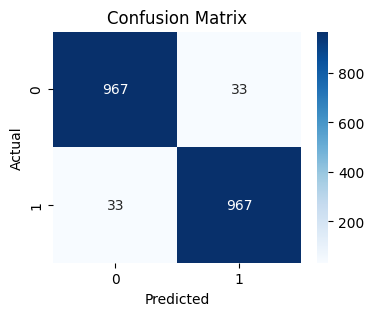

In [62]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Get your predictions & probabilities
y_pred, y_prob = weighted_rf_predict(rf, tree_weights, X_val)

# 2) Compute metrics
acc   = accuracy_score(y_val, y_pred)
prec  = precision_score(y_val, y_pred)
rec   = recall_score(y_val, y_pred)
f1    = f1_score(y_val, y_pred)
auc   = roc_auc_score(y_val, y_prob)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"AUC      : {auc:.4f}\n")

# 3) Full classification report (includes support)
print("Classification Report:\n")
print(classification_report(y_val, y_pred, digits=4))

# 4) Confusion matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [63]:
# Baseline (unweighted) RF
y_pred_base = rf.predict(X_val)
acc_base  = accuracy_score(y_val, y_pred_base)
auc_base  = roc_auc_score(y_val, rf.predict_proba(X_val)[:,1])
print(f"Baseline RF →  Acc: {acc_base:.4f}, AUC: {auc_base:.4f}")

# Weighted RF
y_pred_w, y_prob_w = weighted_rf_predict(rf, tree_weights, X_val)
acc_w  = accuracy_score(y_val, y_pred_w)
auc_w  = roc_auc_score(y_val, y_prob_w)
print(f"Weighted RF →  Acc: {acc_w:.4f}, AUC: {auc_w:.4f}")


Baseline RF →  Acc: 0.9660, AUC: 0.9978
Weighted RF →  Acc: 0.9670, AUC: 0.9978
